In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.metrics import *
from imblearn.metrics import *
from sklearn.impute import *

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
df= pd.read_csv('WineQT.csv')

In [123]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [124]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [125]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

- All the column has numerical data type

In [126]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970,-0.275826
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394,-0.007892
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821,-0.139011
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002,-0.046344
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085,-0.088099
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260,0.095268
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339,-0.107389
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208,-0.363926
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453,0.132904
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710,-0.103954


In [127]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

<Axes: >

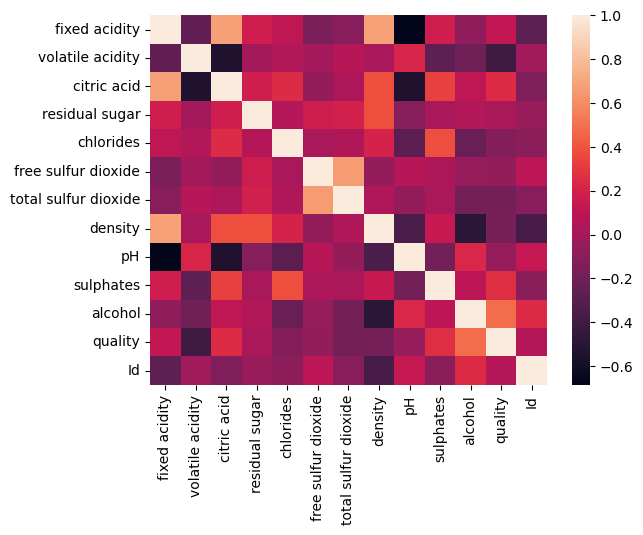

In [128]:
sns.heatmap(df.corr())

- Volatile acidity has the lowest correlation
- So we drop this feature

In [129]:
df = df.drop(['volatile acidity'],axis=1)

In [130]:
df = df.drop(['Id', 'density'],axis=1)

- Density and acidity has the lowest correlation with quality, which is our target variable
- So these features were dropped 

In [131]:
df.columns

Index(['fixed acidity', 'citric acid', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'sulphates',
       'alcohol', 'quality'],
      dtype='object')

# Feature Engineering

In [132]:
df["acidity_ratio"] = df["citric acid"] / df["fixed acidity"]
df["sulfur_ratio"] = df["free sulfur dioxide"] / df["total sulfur dioxide"]
df["alcohol_sugar_ratio"] = df["alcohol"] / (df["residual sugar"] + 1)
df["acidity_sulphates"] = df["fixed acidity"] * df["sulphates"]
df["log_chlorides"] = np.log1p(df["chlorides"])
df["log_total_sulfur_dioxide"] = np.log1p(df["total sulfur dioxide"])
df["fixed_acidity_squared"] = df["fixed acidity"] ** 2

In [133]:
df.head()

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality,acidity_ratio,sulfur_ratio,alcohol_sugar_ratio,acidity_sulphates,log_chlorides,log_total_sulfur_dioxide,fixed_acidity_squared
0,7.4,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,5,0.000000,0.323529,3.241379,4.144,0.073250,3.555348,54.76
1,7.8,0.00,2.6,0.098,25.0,67.0,3.20,0.68,9.8,5,0.000000,0.373134,2.722222,5.304,0.093490,4.219508,60.84
2,7.8,0.04,2.3,0.092,15.0,54.0,3.26,0.65,9.8,5,0.005128,0.277778,2.969697,5.070,0.088011,4.007333,60.84
3,11.2,0.56,1.9,0.075,17.0,60.0,3.16,0.58,9.8,6,0.050000,0.283333,3.379310,6.496,0.072321,4.110874,125.44
4,7.4,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,5,0.000000,0.323529,3.241379,4.144,0.073250,3.555348,54.76


In [134]:
df["quality"] = df["quality"].apply(lambda x: 1 if x >= 7 else 0)

In [135]:
df['quality'].nunique()

2

In [136]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
print(numeric_columns)

Index(['fixed acidity', 'citric acid', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'sulphates',
       'alcohol', 'quality', 'acidity_ratio', 'sulfur_ratio',
       'alcohol_sugar_ratio', 'acidity_sulphates', 'log_chlorides',
       'log_total_sulfur_dioxide', 'fixed_acidity_squared'],
      dtype='object')


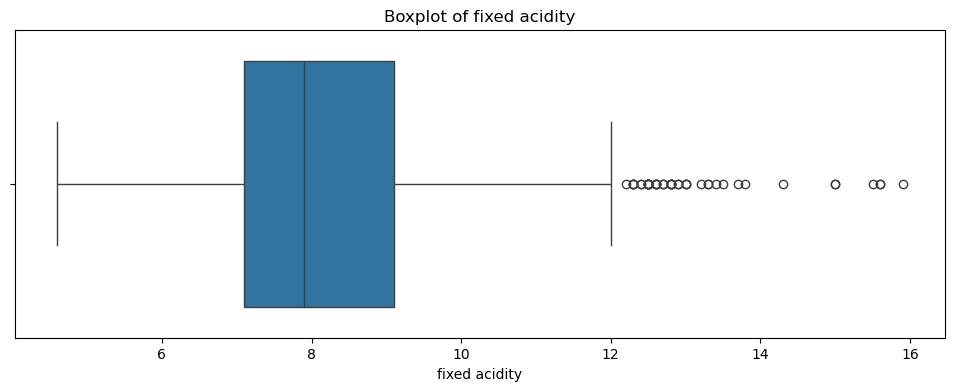

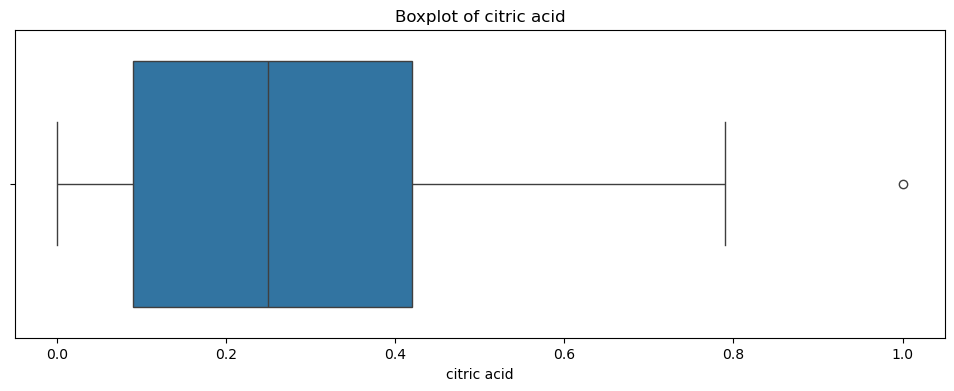

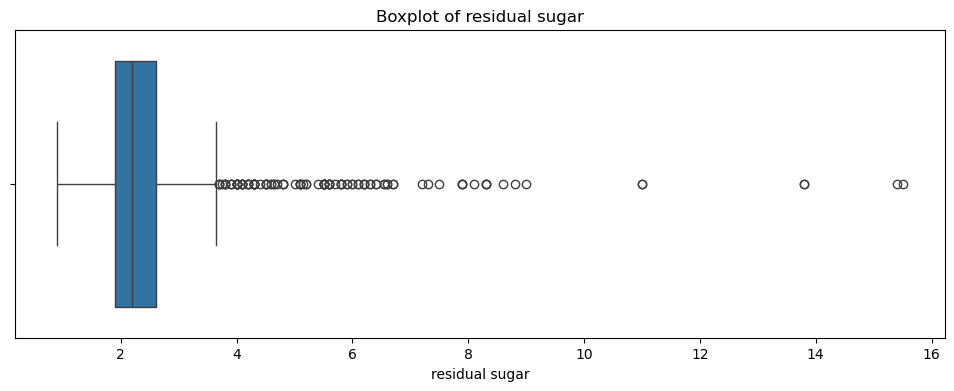

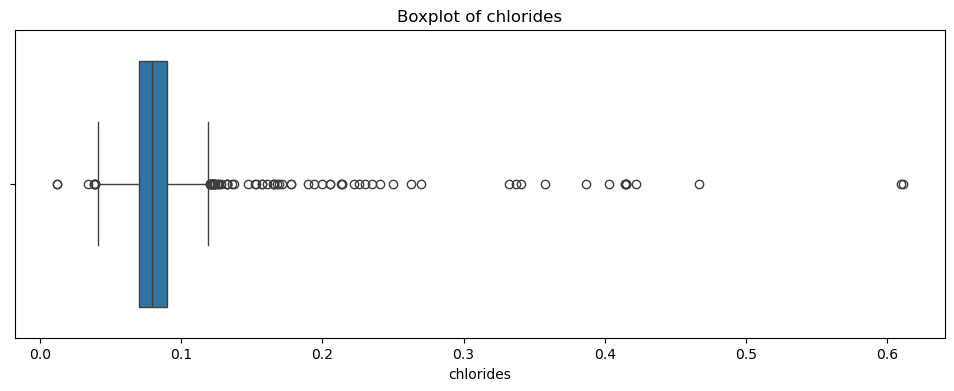

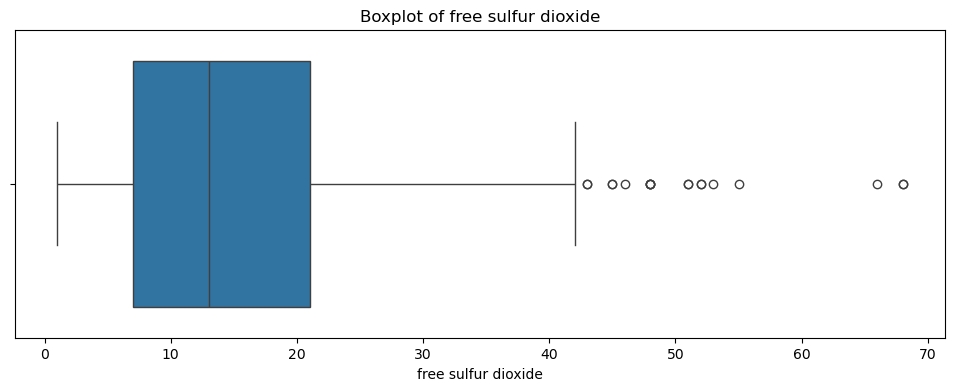

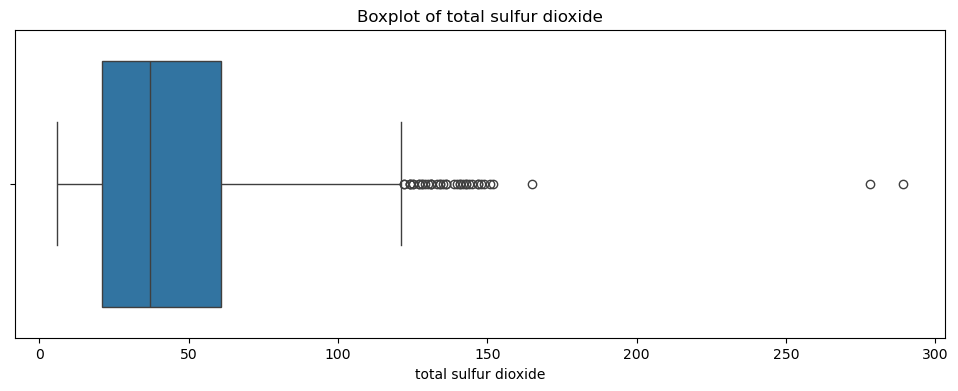

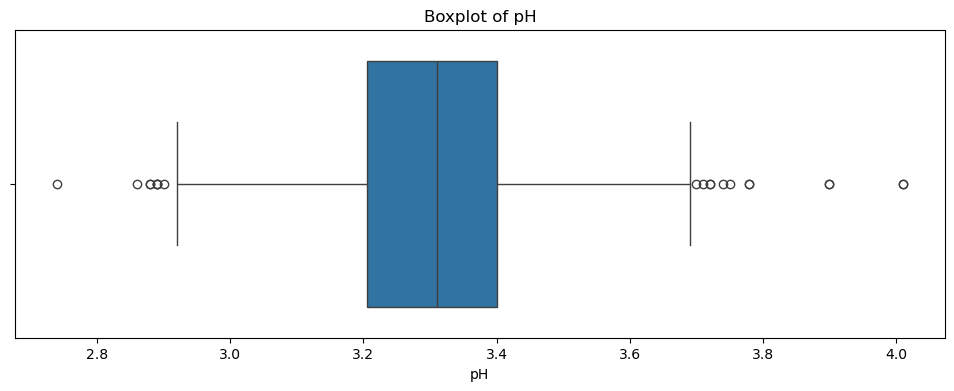

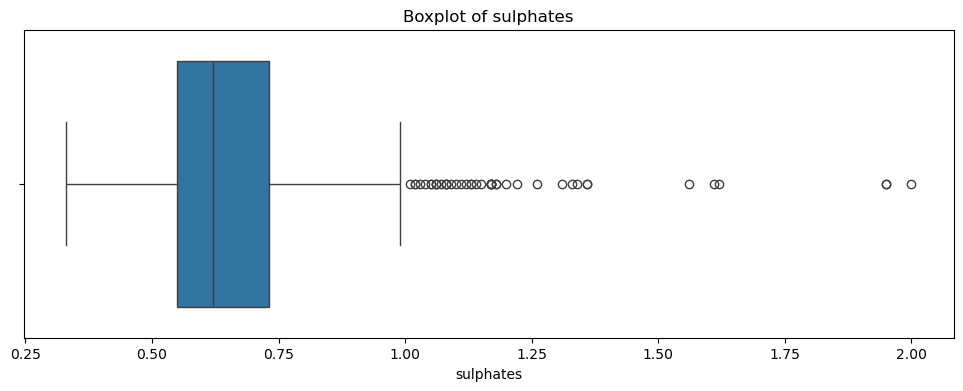

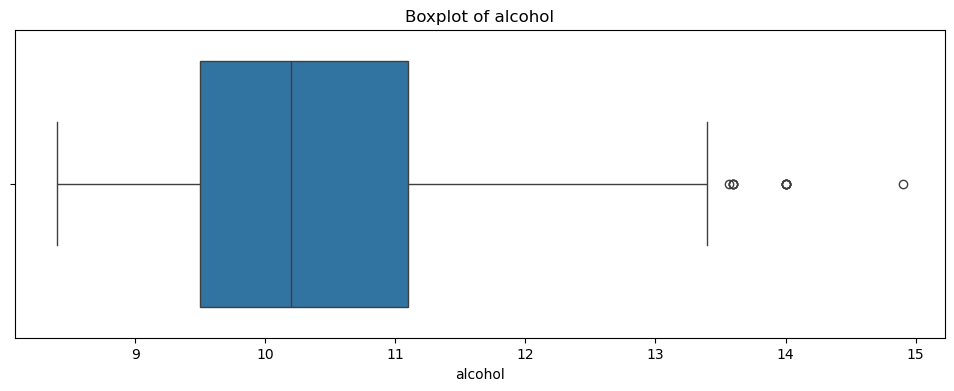

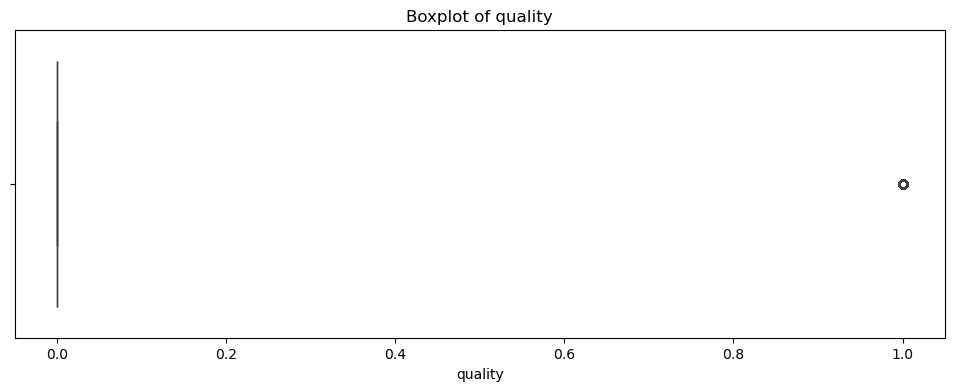

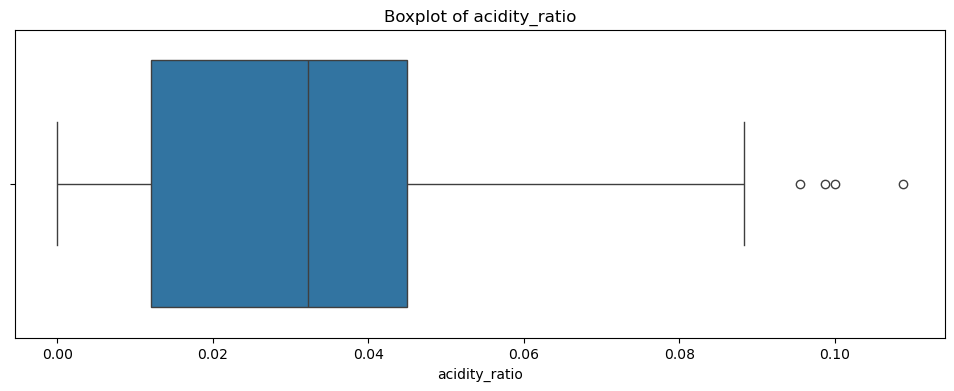

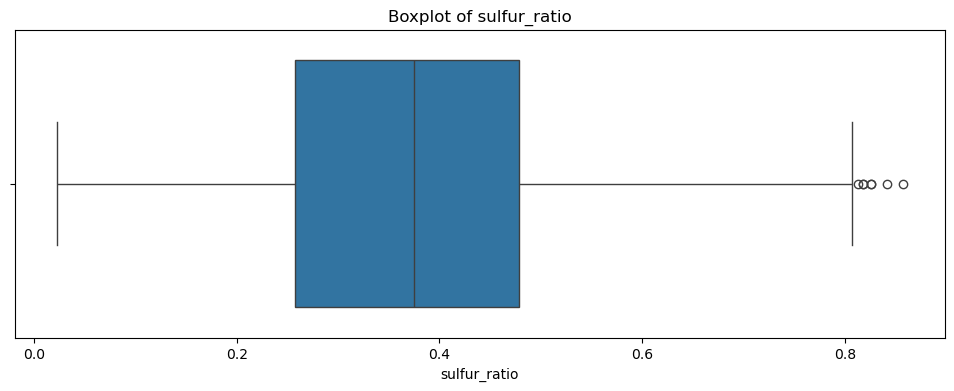

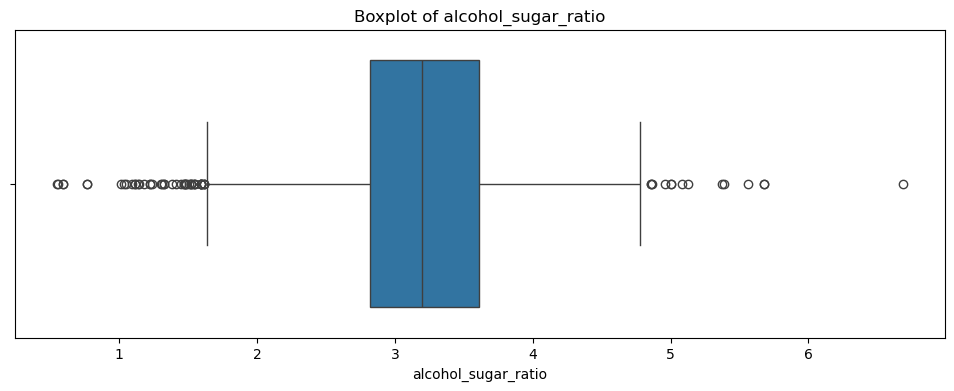

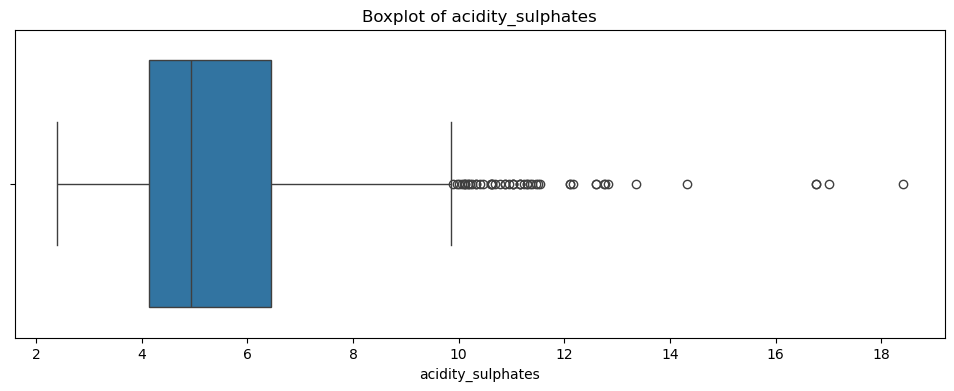

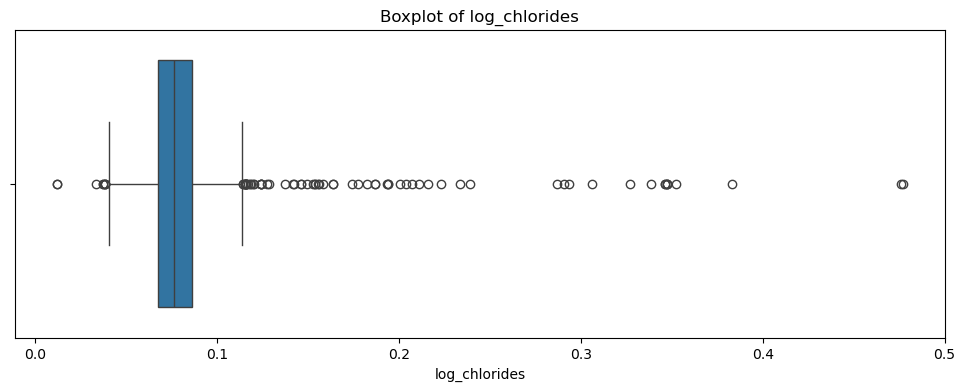

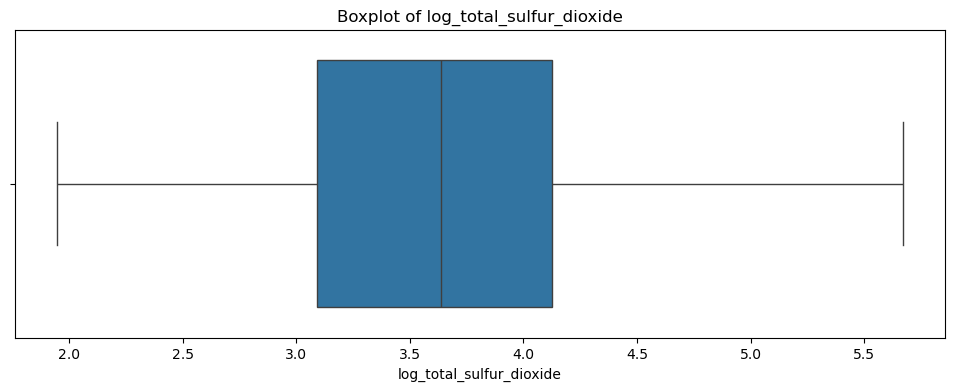

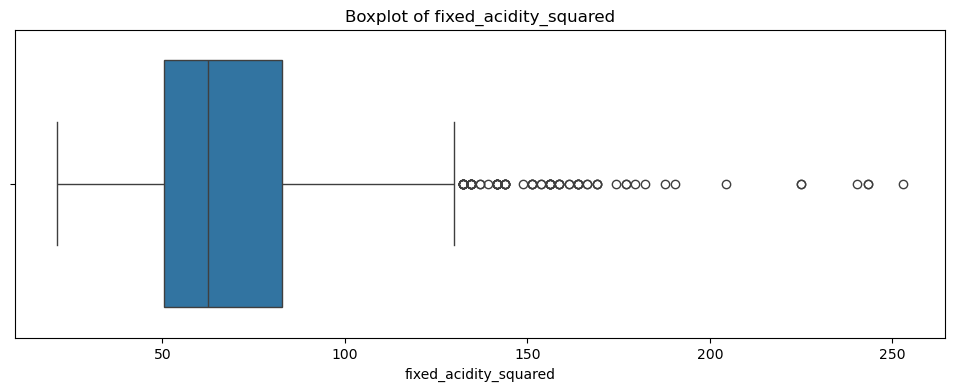

In [137]:
for column in numeric_columns:
    plt.figure(figsize=(12, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [138]:
numerical_cols = df.select_dtypes(include=['number'])

skewness_values = numerical_cols.skew()

print("Skewness of numerical columns:\n")
print(skewness_values)

Skewness of numerical columns:

fixed acidity               1.044930
citric acid                 0.371561
residual sugar              4.361096
chlorides                   6.026360
free sulfur dioxide         1.231261
total sulfur dioxide        1.665766
pH                          0.221138
sulphates                   2.497266
alcohol                     0.863313
quality                     2.088471
acidity_ratio               0.222503
sulfur_ratio                0.429432
alcohol_sugar_ratio        -0.361208
acidity_sulphates           1.739066
log_chlorides               5.348773
log_total_sulfur_dioxide    0.002587
fixed_acidity_squared       1.730248
dtype: float64


<Axes: >

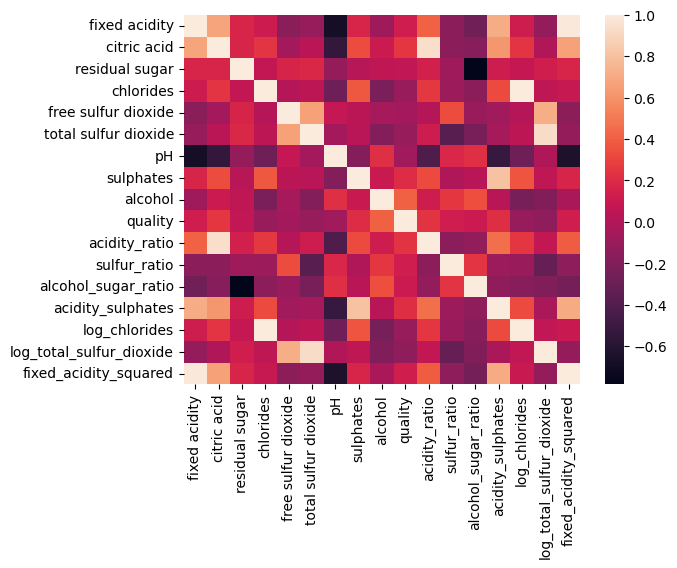

In [139]:
sns.heatmap(df.corr())

In [140]:
Q1 = df["residual sugar"].quantile(0.25)
Q3 = df["residual sugar"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df["residual sugar"] >= lower_bound) & (df["residual sugar"] <= upper_bound)]

In [141]:
Q1 = df["chlorides"].quantile(0.25)
Q3 = df["chlorides"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df["chlorides"] >= lower_bound) & (df["chlorides"] <= upper_bound)]

In [142]:
Q1 = df["log_chlorides"].quantile(0.25)
Q3 = df["log_chlorides"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df["log_chlorides"] >= lower_bound) & (df["log_chlorides"] <= upper_bound)]

In [143]:
numerical_cols = df.select_dtypes(include=['number'])

skewness_values = numerical_cols.skew()

print("Skewness of numerical columns:\n")
print(skewness_values)

Skewness of numerical columns:

fixed acidity               1.011888
citric acid                 0.379504
residual sugar              0.572668
chlorides                   0.035225
free sulfur dioxide         0.999626
total sulfur dioxide        1.291116
pH                          0.079773
sulphates                   2.559200
alcohol                     0.942511
quality                     2.198860
acidity_ratio               0.109069
sulfur_ratio                0.433340
alcohol_sugar_ratio         0.605851
acidity_sulphates           1.901350
log_chlorides               0.002341
log_total_sulfur_dioxide    0.006050
fixed_acidity_squared       1.597444
dtype: float64


In [144]:
df.shape

(928, 17)

In [145]:
df['quality'].value_counts()

quality
0    807
1    121
Name: count, dtype: int64

- Here we can see that the imbalance ratio is too much
- Which can create problems

- As the imbalance ratio is too high
- We will use SMOTE
- So that our training set has a balance set of majority and minority class

# Model Training

In [146]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [147]:
x = df.drop(columns=['quality'])  
y = df['quality'] 

In [148]:
scores={'accuracy': make_scorer(accuracy_score),
        'recall' : make_scorer(recall_score),
        'specificity':make_scorer(recall_score,pos_label=0),
        'gmean': make_scorer(geometric_mean_score),    # is available in imblearn library, not in sklearn
        'roc': make_scorer(roc_auc_score),
        'mcc': make_scorer(matthews_corrcoef)
        }

In [149]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [150]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

C:\Users\Rafid Mahmud\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [151]:
y_resampled

0       0
1       0
2       0
3       0
4       0
       ..
1609    1
1610    1
1611    1
1612    1
1613    1
Name: quality, Length: 1614, dtype: int64

### Random Forest Model

In [152]:
rf_pipeline = Pipeline([  
    ('scaler', StandardScaler()), 
    ('rf', RandomForestClassifier(random_state=42))  
])

rf_result = cross_validate(rf_pipeline, x_resampled, y_resampled, cv=skf, n_jobs=-1, scoring=scores)
df= pd.DataFrame(rf_result)
df

,fit_time,score_time,test_accuracy,test_recall,test_specificity,test_gmean,test_roc,test_mcc
0,1.128694,0.051969,0.956790,0.950617,0.962963,0.956770,0.956790,0.913650
1,1.645001,0.161299,0.950617,0.987654,0.913580,0.949896,0.950617,0.903717
2,1.937063,0.100738,0.969136,1.000000,0.938272,0.968644,0.969136,0.940064
3,1.939466,0.094848,0.932099,0.938272,0.925926,0.932078,0.932099,0.864263
4,1.556583,0.156999,0.956522,0.962500,0.950617,0.956540,0.956559,0.913117
5,1.788033,0.120015,0.937888,0.987500,0.888889,0.936898,0.938194,0.880200
6,1.879754,0.108853,0.950311,0.987500,0.913580,0.949821,0.950540,0.903173
7,1.829814,0.111042,0.906832,0.975309,0.837500,0.903781,0.906404,0.821216
8,1.773736,0.106215,0.962733,1.000000,0.925000,0.961769,0.962500,0.928012
9,1.780058,0.121526,0.919255,0.962963,0.875000,0.917928,0.918981,0.841607


In [153]:
result = pd.DataFrame({'Metric': ['fit_time', 'score_time', 'test_accuracy', 'test_recall',
                             'test_specificity', 'test_gmean', 'test_roc', 'test_mcc']})

In [154]:
df.mean(axis=0)

fit_time            1.725820
score_time          0.113351
test_accuracy       0.944218
test_recall         0.975231
test_specificity    0.913133
test_gmean          0.943413
test_roc            0.944182
test_mcc            0.890902
dtype: float64

In [155]:
result['RF']= df.mean(axis=0).values.tolist()
result

,Metric,RF
0,fit_time,1.725820
1,score_time,0.113351
2,test_accuracy,0.944218
3,test_recall,0.975231
4,test_specificity,0.913133
5,test_gmean,0.943413
6,test_roc,0.944182
7,test_mcc,0.890902


### SGD Model Training

In [156]:
sgd_pipeline = Pipeline([  
    ('scaler', StandardScaler()), 
    ('sgd', SGDClassifier(random_state=42))  
])

sgd_result = cross_validate(sgd_pipeline, x_resampled, y_resampled, cv=skf, n_jobs=-1, scoring=scores)
df= pd.DataFrame(sgd_result)
result['SGD']= df.mean(axis=0).values.tolist()
result

,Metric,RF,SGD
0,fit_time,1.725820,0.023664
1,score_time,0.113351,0.025849
2,test_accuracy,0.944218,0.812234
3,test_recall,0.975231,0.858488
4,test_specificity,0.913133,0.765772
5,test_gmean,0.943413,0.809239
6,test_roc,0.944182,0.812130
7,test_mcc,0.890902,0.630508


### SVC Model Training

In [158]:
svc_pipeline = Pipeline([  
    ('scaler', StandardScaler()), 
    ('svc', SVC(random_state=42))  
])

svc_result = cross_validate(svc_pipeline, x_resampled, y_resampled, cv=skf, n_jobs=-1, scoring=scores)
df= pd.DataFrame(svc_result)
result['SVC']= df.mean(axis=0).values.tolist()
result

,Metric,RF,SGD,SVC
0,fit_time,1.725820,0.023664,0.170966
1,score_time,0.113351,0.025849,0.077300
2,test_accuracy,0.944218,0.812234,0.911395
3,test_recall,0.975231,0.858488,0.956636
4,test_specificity,0.913133,0.765772,0.866096
5,test_gmean,0.943413,0.809239,0.909779
6,test_roc,0.944182,0.812130,0.911366
7,test_mcc,0.890902,0.630508,0.827394


- Random Forest (RF) is the best model overall.
- It has the highest accuracy (94.42%), recall, specificity, and MCC.
- It balances both false positives and false negatives well.

- SVC is a close second.
- Accuracy (91.14%) is slightly lower than RF but better than SGD.
- Recall and specificity are also strong.

- SGD performs the worst.
- Accuracy (81.22%) is the lowest.
- Specificity (76.58%) is much lower than RF and SVC, meaning it struggles with false positives.
- MCC (63.05%) is the weakest, showing poor overall correlation.

# Visualization

C:\Users\Rafid Mahmud\AppData\Local\Temp\ipykernel_5440\1909555542.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis', width=0.3)


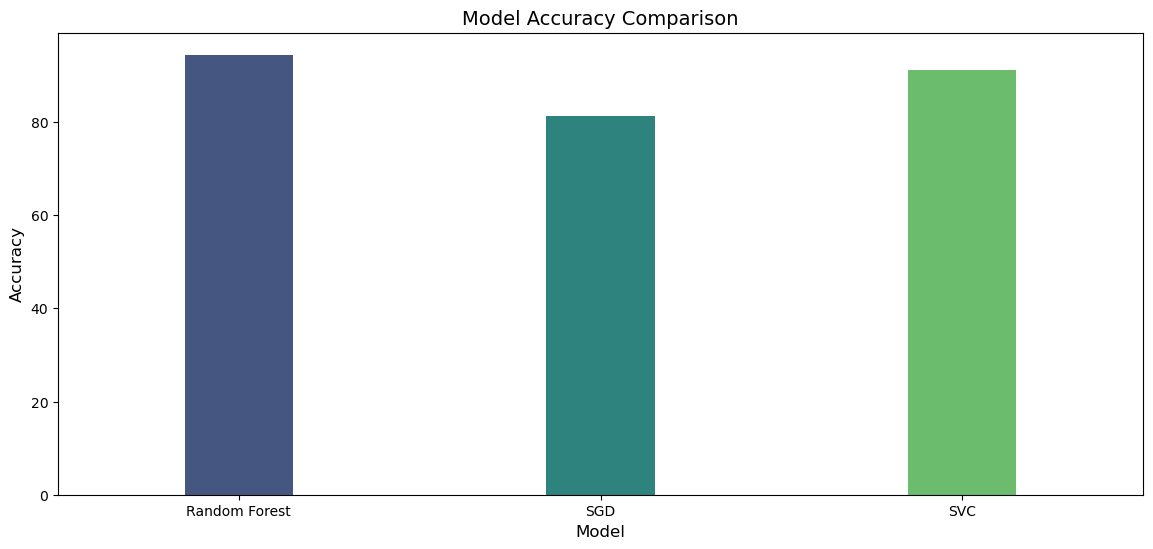

In [174]:
model_results = {
    'Model': ['Random Forest', 'SGD', 'SVC'],
    'Accuracy': [0.944218 *100, 0.812234 *100, 0.911395*100]  
}

results_df = pd.DataFrame(model_results)

plt.figure(figsize=(14,6))
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis', width=0.3)

plt.title('Model Accuracy Comparison', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

plt.show()

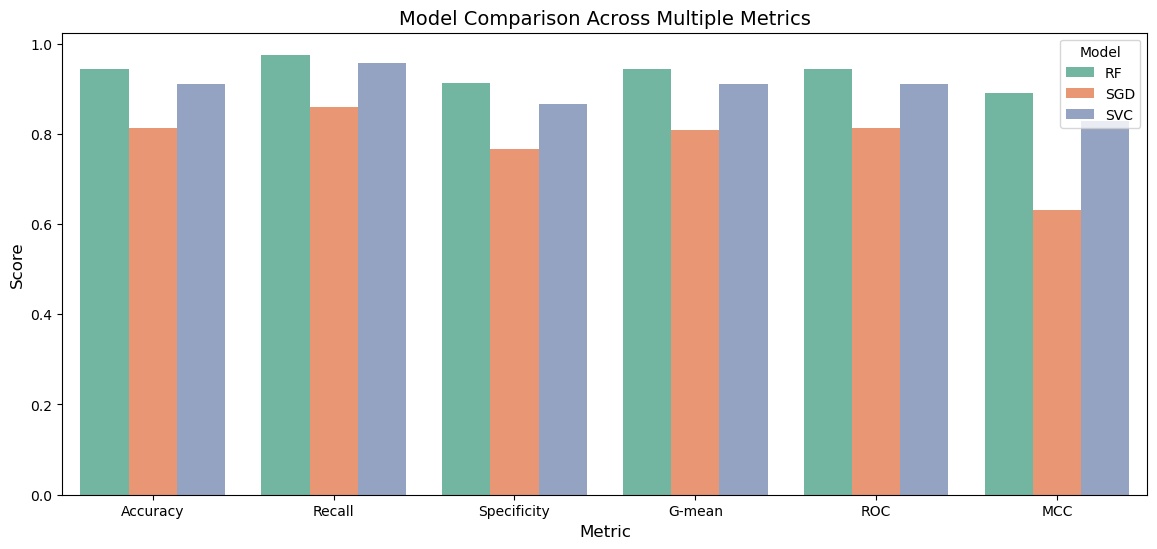

In [164]:
metrics_results = {
    'Metric': ['Accuracy', 'Recall', 'Specificity', 'G-mean', 'ROC', 'MCC'],
    'RF': [0.944218, 0.975231, 0.913133, 0.943413, 0.944182, 0.890902],
    'SGD': [0.812234, 0.858488, 0.765772, 0.809239, 0.812130, 0.630508],
    'SVC': [0.911395, 0.956636, 0.866096, 0.909779, 0.911366, 0.827394]
}

metrics_df = pd.DataFrame(metrics_results)

metrics_df = metrics_df.melt(id_vars='Metric', var_name='Model', value_name='Score')

plt.figure(figsize=(14,6))
sns.barplot(x='Metric', y='Score', hue='Model', data=metrics_df, palette='Set2')

plt.title('Model Comparison Across Multiple Metrics', fontsize=14)
plt.xlabel('Metric', fontsize=12)
plt.ylabel('Score', fontsize=12)

plt.show()


- Clearly we can see that Random Forest model has the highest accuracy and recall score for predicting the wine quality

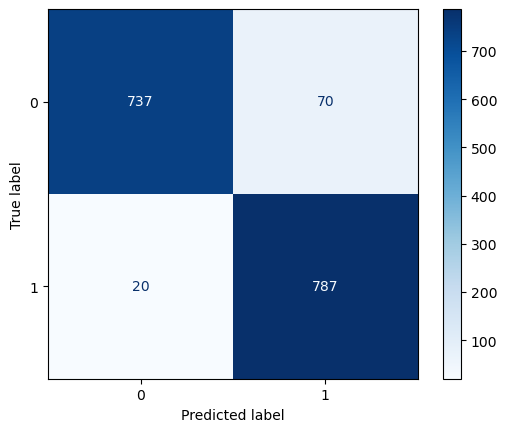

<Figure size 1400x600 with 0 Axes>

In [172]:
y_pred = cross_val_predict(rf_pipeline, x_resampled, y_resampled, cv=skf, n_jobs=-1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_resampled, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.figure(figsize=(14,6))
plt.show()

- From the confusion matrix plot, we can see that the accuracy of the RF model is quite high

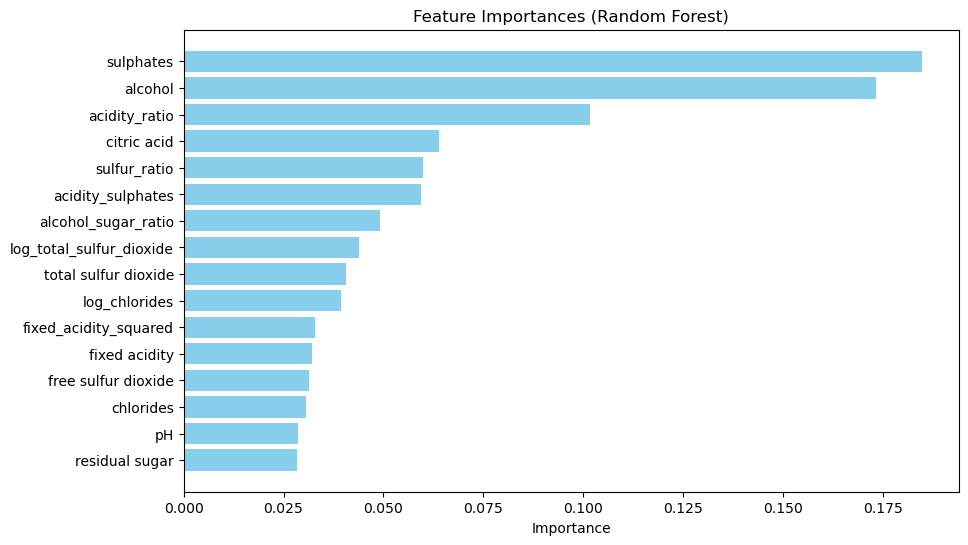

                     Feature  Importance
7                  sulphates    0.184658
8                    alcohol    0.173130
9              acidity_ratio    0.101703
1                citric acid    0.063858
10              sulfur_ratio    0.059998
12         acidity_sulphates    0.059402
11       alcohol_sugar_ratio    0.049245
14  log_total_sulfur_dioxide    0.043931
5       total sulfur dioxide    0.040722
13             log_chlorides    0.039263
15     fixed_acidity_squared    0.032846
0              fixed acidity    0.032213
4        free sulfur dioxide    0.031284
3                  chlorides    0.030643
6                         pH    0.028740
2             residual sugar    0.028365


In [173]:
rf_pipeline.fit(x_resampled, y_resampled)

feature_importances = rf_pipeline.named_steps['rf'].feature_importances_

features = x_resampled.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances (Random Forest)')
plt.gca().invert_yaxis()  
plt.show()

print(importance_df)

- Most important features for this quality prediction is the presence of sulphate and alcohol

- Density and acidity had the least correlation with quality
- So those features were dropped